In [3]:
%matplotlib inline

import numpy as np
import collections
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO

import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show 
import matplotlib.patches as patches    
from matplotlib import colors


import glob

import subprocess
from subprocess import call

import re

import pickle

from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

from scipy import stats


from Bio.SubsMat import MatrixInfo
import Bio.Data.CodonTable

In [4]:
# open metadata with scores and metrics
meta = pd.read_csv('tmp_res/METADATA_CURRENT.txt', sep='\t')

# gencode 25
metadata_pc_g25 = pd.read_csv('tmp_res/metadata_pc_g25.txt', sep='\t')


P_Set = pd.read_csv('tmp_res/SET1.txt', sep='\t')

R_Set = pd.read_csv('tmp_res/SET2.txt', sep='\t')

R_Set['pos_of_codon'] = [int(x.split('; ')[1].split('-')[0])-1 for x in R_Set.Riboseq_Summary.tolist()]

R_Set['codon'] = [x.split('; ')[0] for x in R_Set.Riboseq_Summary.tolist()]

R_Set[0:2]

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,CDS_ratio,pos_of_codon,codon
0,ENST00000379389.4,ISG15,1,151,50.0,chr1:1013424-1013573,+,chr1:1013424-1013573,-2443.9971,111,0;0;0,ATC; 98-152; Rank: 288; cov: 53.85,53.846154,0.0,"basic,appris_principal_1,CCDS",protein_coding,0.327240,97,ATC
1,ENST00000349431.10,UBE2J2,28,220,64.0,chr1:1273666-1273815,-,chr1:1273666-1273857,-1285.8186,78,0;0;0,ACG; 173-221; Rank: 328; cov: 90.91,90.909091,0.0,"basic,appris_principal_1,CCDS",protein_coding,0.762814,172,ACG


In [5]:
transl_with_all_codons = pd.read_csv('data/extensions_TripsViz_1perGene_AUG_NearCognates.txt', sep=',')

transl_with_all_codons.columns = ['gene_ext', 'tr_id1', 'Start_ext', 'Stop_ext', 'len_ext', 
                                 'global_rank_ext', 'type_all_codons', 'trips_viz_link', 'Start_codon_ext', 
                                 'Highframe rank', 'Highframe value',
       'Lowframe rank', 'Lowframe value', 'Stop rank', 'Stop value',
       'Start rank', 'Start value', 'Coverage rank', 'Coverage_value_ext',
       'Amino acid sequence', 'Proteomics_count_ext', 'CDS_ratio']

transl_with_all_codons2 = transl_with_all_codons[['gene_ext', 'tr_id1', 'Start_ext', 'Stop_ext', 
                                                 'global_rank_ext', 'Start_codon_ext', 
                                                 'Proteomics_count_ext', 'Coverage_value_ext', 'CDS_ratio']]

transl_with_all_codons2['Riboseq_Summary'] = transl_with_all_codons2['Start_codon_ext']+'; '+transl_with_all_codons2['Start_ext'].astype(str)+'-'+transl_with_all_codons2['Stop_ext'].astype(str)+'; Rank: '+transl_with_all_codons2['global_rank_ext'].astype(str)+'; cov: '+np.round(transl_with_all_codons2['Coverage_value_ext'],2).astype(str)


transl_with_all_codons2[0:5]

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gene_ext,tr_id1,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary
0,ASPH,ENST00000379454,144,189,1,CTG,0.0,100.000000,1.645069,CTG; 144-189; Rank: 1; cov: 100.0
1,HSP90AA1,ENST00000216281,168,207,2,GTG,0.0,100.000000,3.081078,GTG; 168-207; Rank: 2; cov: 100.0
2,CD24,ENST00000619133,408,441,3,CTG,0.0,83.333333,11.578498,CTG; 408-441; Rank: 3; cov: 83.33
3,HN1,ENST00000409753,242,287,4,TTG,0.0,100.000000,0.588389,TTG; 242-287; Rank: 4; cov: 100.0
4,YBX1,ENST00000321358,44,140,5,CTG,0.0,85.185185,7.709763,CTG; 44-140; Rank: 5; cov: 85.19


In [8]:
transl_with_all_codons2[transl_with_all_codons2['gene_ext'] == 'XRRA1']

,gene_ext,tr_id1,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary
710,XRRA1,ENST00000340360,156,333,711,GTG,0.0,46.296296,0.969623,GTG; 156-333; Rank: 711; cov: 46.3


In [9]:
transl_with_all_codons2[transl_with_all_codons2['gene_ext'] == 'NPLOC4']

,gene_ext,tr_id1,Start_ext,Stop_ext,global_rank_ext,Start_codon_ext,Proteomics_count_ext,Coverage_value_ext,CDS_ratio,Riboseq_Summary
303,NPLOC4,ENST00000331134,85,217,304,AAG,40.0,79.487179,0.228957,AAG; 85-217; Rank: 304; cov: 79.49


CDS_ratio is a ratio of the reads in the region of interest (so extensions in this case) to reads in the CDS, normalised by the corresponding length of each. 

ext_ratio / cds

In [10]:
li = []

for el in P_Set[['tr_id', 'Riboseq_Summary']].to_numpy():
    tr_id = el[0]
    summary = el[1]
    if summary is np.nan:
        rank = 8000
    else:
        rank = int(summary.split('Rank: ')[1].split(';')[0])

    li.append([tr_id, rank, summary])
    
df = pd.DataFrame(li, columns = ['tr_id', 'rank', 'summary'])

P_Set2 = P_Set.merge(df, on='tr_id', how='inner')

P_Set2[0:2]

,tr_id,gene,N_term_start1,N_term_end1,len_codons,global_coo_50_and_less,strand,global_coo_primary,PhyloCSF120score,number_of_records,ovlp,Riboseq_Summary,Coverage_value_ext,Proteomics_count_ext,tag,transcript_type,rank,summary
0,ENST00000377898.3,HES3,2,65,21.0,chr1:6244194-6244241+chr1:6244351-6244365,+,chr1:6244194-6244241+chr1:6244351-6244365,210.1621,118,0;0;0,ACG; 6-66; Rank: 1907; cov: 40.0,40.0,0.0,"basic,appris_principal_1,CCDS",protein_coding,1907,ACG; 6-66; Rank: 1907; cov: 40.0
1,ENST00000400907.6,RERE,2,74,24.0,chr1:8656298-8656369,-,chr1:8656298-8656369,108.1564,119,0;0;0,NaN,NaN,NaN,"not_organism_supported,dotter_confirmed,basic",protein_coding,8000,NaN


In [11]:
li = []

for el in P_Set2[['gene', 'tr_id', 'rank']].to_numpy():
    rank = el[2]
    gene = el[0]
    tr_id = el[1].split('.')[0]
    cds_start_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_start_pos 
    cds_stop_pos = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].cds_stop_pos
    frame = ((cds_start_pos) % 3) + 1
    cds_len = cds_stop_pos - cds_start_pos
    
    if len(glob.glob('data/TRIPSlike_plots_data_PhyloSET/%s_%s_unamb.csv' % (gene, tr_id))) != 0:  
        file_counts = pd.read_csv('data/TRIPSlike_plots_data_PhyloSET/%s_%s_unamb.csv' % (gene, tr_id))
        CDS_counts = file_counts[cds_start_pos:cds_stop_pos]['Frame '+str(frame)].sum()
        CDS_coverage = CDS_counts / cds_len
    else:
        CDS_coverage = 0
        
    
    
    
    
    #print ('frame 1', file_counts[cds_start_pos:cds_stop_pos]['Frame 1'].sum())
    #print ('frame 2', file_counts[cds_start_pos:cds_stop_pos]['Frame 2'].sum())
    #print ('frame 3', file_counts[cds_start_pos:cds_stop_pos]['Frame 3'].sum())
    #print ('cds_frame', frame)
    
    li.append([gene, tr_id, cds_len, CDS_coverage, rank])

In [12]:
plot_df = pd.DataFrame(li, columns = ['gene', 'tr_id', 'cds_len', 'CDS_coverage', 'rank'])

plot_df[0:2]

,gene,tr_id,cds_len,CDS_coverage,rank
0,HES3,ENST00000377898,561,4.606061,1907
1,RERE,ENST00000400907,1755,3.852422,8000


/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


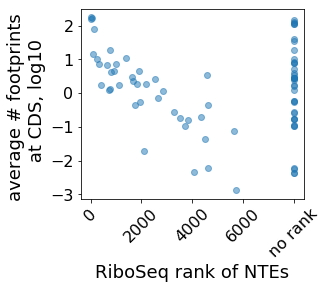

In [13]:
plt.figure(figsize=(4,3.5))

plt.scatter(y=np.log10(plot_df['CDS_coverage'].tolist()), 
            x=plot_df['rank'].tolist(), alpha=0.5)

plt.xticks(range(0, 9000, 2000), [0, 2000, 4000, 6000, 'no rank'], fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.xlabel('RiboSeq rank of NTEs', fontsize=18)
plt.ylabel('average # footprints \n at CDS, log10', fontsize=18)

#plt.yscale('log')

plt.show()

In [14]:
plot_df['log10_cds_cov'] = np.log(plot_df['CDS_coverage'].to_numpy()+0.01)

y = plot_df[plot_df['rank'] != 8000]['log10_cds_cov'].tolist()

x = plot_df[plot_df['rank'] != 8000]['rank'].tolist()

from scipy import stats
stats.spearmanr(y,x)

SpearmanrResult(correlation=-0.8734345997905292, pvalue=5.011869480957413e-15)

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


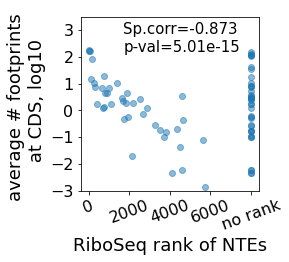

In [35]:
plt.figure(figsize=(3.2,3.2))

#sl, interc = np.polyfit(x, y, 1)

#x1 = 0
#x2 = 6000

#y1 = x1*sl+interc
#y2 = x2*sl+interc

#plt.plot([x1,x2], [y1,y2], 'r-')

plt.scatter(y=np.log10(plot_df['CDS_coverage'].tolist()), 
            x=plot_df['rank'].tolist(), alpha=0.5)

plt.xticks(range(0, 9000, 2000), [0, 2000, 4000, 6000, 'no rank'], fontsize=16, rotation=20)
plt.yticks(fontsize=16)

plt.xlabel('RiboSeq rank of NTEs', fontsize=18)
plt.ylabel('average # footprints \n at CDS, log10', fontsize=18)

#plt.legend(loc=9, prop={'size': 15})

plt.text(x=1700, y=2.2, s='Sp.corr=-0.873 \np-val=5.01e-15', fontsize=15)

plt.ylim(-3, 3.5)

plt.show()

# Ovlp between PhyloSET and RiboSET and generated PhyloSET (60 genes from 20k) and RiboSET 

In [36]:
from random import sample

tmp = transl_with_all_codons2[['gene_ext', 'global_rank_ext']]

all_genes = list(metadata_pc_g25.gene.unique())
print (len(all_genes))


def get_ovlp(thr=500):
    if thr <= 10470:
        return len(set(tmp[0:thr]['gene_ext'].tolist()).intersection(list(P_Set['gene'].unique())))
    else: 
        return len(set(tmp[0:10470]['gene_ext'].tolist()).intersection(list(P_Set['gene'].unique())))

20330


In [37]:
# PhyloSET and 500 RiboSET, PhyloSET and 1000 RiboSET, PhyloSET and 1500 RiboSET etc 

real_ovlps_based_on_thr = [get_ovlp(thr=thr) for thr in range(0, 11000, 500)]

print (len(real_ovlps_based_on_thr))

22


In [38]:
# PhyloSET and 500, 1000, 1500 randomly drawn genes from 20k genes with 100 iterations 
random_ovlps = []

for i in range(0, 11000, 500):
    kek_li = []
    for iter in range(0, 5000):
        kek = len(set(P_Set.gene.tolist()).intersection(sample(all_genes, i)))
        kek_li.append(kek)
        
    mean_kek = np.median(kek_li)
    random_ovlps.append(mean_kek)
    
print (len(random_ovlps))

22


In [39]:
x = np.arange(0, 22, 1)

axis_x = list(range(0, 11000, 500))

len(real_ovlps_based_on_thr), len(random_ovlps), len(x)

(22, 22, 22)

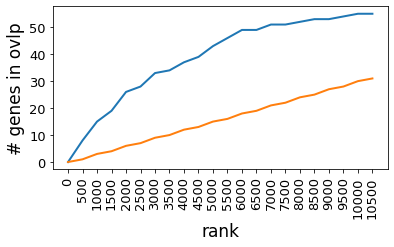

In [40]:
plt.figure(figsize=(6, 3))

plt.plot(x, real_ovlps_based_on_thr, linewidth=2, markersize=12, label='RiboSET olvp PhyloSET')

plt.plot(x, random_ovlps, linewidth=2, markersize=12, label='random ovlp PhyloSET')

plt.yticks(list(range(0, 60, 10)), list(range(0, 60, 10)), fontsize=13)
plt.xticks(np.arange(0, 22, 1), list(range(0, 11000, 500)), fontsize=13, rotation=90)

plt.xlabel('rank', fontsize=17)

plt.ylabel('# genes in ovlp', fontsize=17)

#plt.legend(loc=1, prop={'size': 13})

#plt.axvline(x=10.1, color = 'red', linestyle='--')


plt.show()

In [41]:
len(set(tmp[0:5000]['gene_ext'].tolist()).intersection(P_Set['gene'].tolist()))

43

# get increases 

In [42]:
x = np.arange(0, 21, 1)

axis_x = list(range(0, 11000, 500))

a = [real_ovlps_based_on_thr[i+1]-real_ovlps_based_on_thr[i] for i in range(0, len(real_ovlps_based_on_thr)-1, 1)]
b = [random_ovlps[i+1]-random_ovlps[i] for i in range(0, len(real_ovlps_based_on_thr)-1, 1)]

len(a), len(b), len(x)

(21, 21, 21)

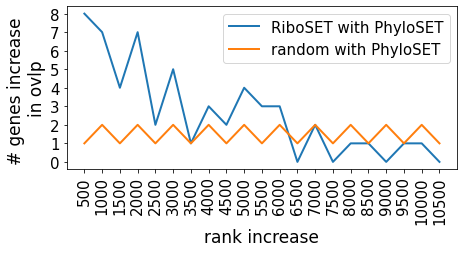

In [47]:
plt.figure(figsize=(7, 3))

plt.plot(x, a, linewidth=2, markersize=12, label='RiboSET with PhyloSET')

plt.plot(x, b, linewidth=2, markersize=12, label='random with PhyloSET')

plt.yticks(list(range(0, 9, 1)), list(range(0, 9, 1)), fontsize=15)
plt.xticks(np.arange(0, 21, 1), list(range(500, 11000, 500)), fontsize=15, rotation=90)

plt.xlabel('rank increase', fontsize=17)

plt.ylabel('# genes increase \nin ovlp', fontsize=17)

plt.legend(loc=1, prop={'size': 15})

#plt.axvline(x=10.1, color = 'red', linestyle='--')


plt.show()

# non-parametric test till rank is max 

In [44]:
# indepenent 

import scipy 

scipy.stats.mannwhitneyu(x = real_ovlps_based_on_thr[0:11], y = random_ovlps[0:11])

MannwhitneyuResult(statistic=16.0, pvalue=0.0019207426921144172)

In [45]:
MannWhitney test, pval=0.002, stat=17.5

SyntaxError: invalid syntax (<ipython-input-45-a512a1b238dc>, line 1)

In [ ]:
6500/500, len(a)

In [ ]:
a[]

In [ ]:
scipy.stats.mannwhitneyu(x = a[0:13], y = b[0:13])

In [ ]:
pvalue=0.0016, statistic=28.5